In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [28]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,22/07/2020,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia,5.606997
1,21/07/2020,21,7,2020,140,5,Afghanistan,AF,AFG,38041757.0,Asia,5.864608
2,20/07/2020,20,7,2020,174,17,Afghanistan,AF,AFG,38041757.0,Asia,6.634814
3,19/07/2020,19,7,2020,12,17,Afghanistan,AF,AFG,38041757.0,Asia,6.910827
4,18/07/2020,18,7,2020,219,32,Afghanistan,AF,AFG,38041757.0,Asia,7.794067
...,...,...,...,...,...,...,...,...,...,...,...,...
31382,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
31383,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
31384,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
31385,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [29]:
covid.to_csv('covid_data.csv')

In [30]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)

In [31]:
covid.drop("geoId",axis=1,inplace=True)
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,22/07/2020,112,4,Afghanistan,Asia,5.606997
1,21/07/2020,140,5,Afghanistan,Asia,5.864608
2,20/07/2020,174,17,Afghanistan,Asia,6.634814
3,19/07/2020,12,17,Afghanistan,Asia,6.910827
4,18/07/2020,219,32,Afghanistan,Asia,7.794067
...,...,...,...,...,...,...
31382,25/03/2020,0,0,Zimbabwe,Africa,NaN
31383,24/03/2020,0,1,Zimbabwe,Africa,NaN
31384,23/03/2020,0,0,Zimbabwe,Africa,NaN
31385,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [32]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [33]:
covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,22/07/2020,112,4,Afghanistan,Asia,5.606997
1,21/07/2020,140,5,Afghanistan,Asia,5.864608
2,20/07/2020,174,17,Afghanistan,Asia,6.634814
3,19/07/2020,12,17,Afghanistan,Asia,6.910827
4,18/07/2020,219,32,Afghanistan,Asia,7.794067
...,...,...,...,...,...,...
31382,25/03/2020,0,0,Zimbabwe,Africa,NaN
31383,24/03/2020,0,1,Zimbabwe,Africa,NaN
31384,23/03/2020,0,0,Zimbabwe,Africa,NaN
31385,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [34]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
31386,21/03/2020,1,0,Zimbabwe,Africa,NaN
31385,22/03/2020,1,0,Zimbabwe,Africa,NaN
31384,23/03/2020,0,0,Zimbabwe,Africa,NaN
31383,24/03/2020,0,1,Zimbabwe,Africa,NaN
31382,25/03/2020,0,0,Zimbabwe,Africa,NaN
...,...,...,...,...,...,...
4,18/07/2020,219,32,Afghanistan,Asia,7.794067
3,19/07/2020,12,17,Afghanistan,Asia,6.910827
2,20/07/2020,174,17,Afghanistan,Asia,6.634814
1,21/07/2020,140,5,Afghanistan,Asia,5.864608


In [35]:
covid1.head()

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
31386,21/03/2020,1,0,Zimbabwe,Africa,NaN
31385,22/03/2020,1,0,Zimbabwe,Africa,NaN
31384,23/03/2020,0,0,Zimbabwe,Africa,NaN
31383,24/03/2020,0,1,Zimbabwe,Africa,NaN
31382,25/03/2020,0,0,Zimbabwe,Africa,NaN


In [36]:
country_wise = covid1.groupby(["country"]).sum()
country_wise

,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
country,,,
Afghanistan,35727,1190,1281.473408
Albania,4290,117,1789.844772
Algeria,24278,1100,669.989637
Andorra,884,52,14723.604238
Angola,749,29,24.863867
...,...,...,...
Vietnam,401,0,5.427001
Western_Sahara,766,1,1614.880386
Yemen,1629,456,71.956848


In [37]:
k=country_wise.nlargest(10, ['cases'])
k.drop("deaths",axis=1,inplace=True)
k.drop("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000",axis=1,inplace=True)
k

,cases
country,
United_States_of_America,3902058
Brazil,2159654
India,1164183
Russia,783328
South_Africa,381798
Peru,362087
Mexico,356255
Chile,334683
United_Kingdom,295817


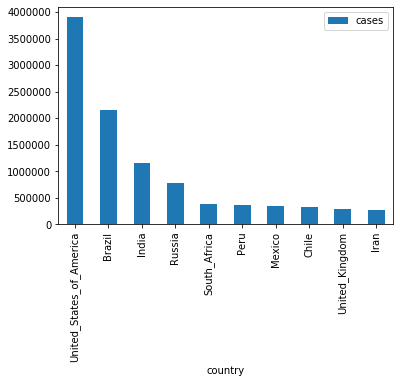

In [38]:
k.plot.bar()
plt.savefig("Top 10 countries in COVID-19 cases.png")

In [40]:
l=country_wise.nlargest(10, ['deaths'])
l.drop("cases",axis=1,inplace=True)
l.drop("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000",axis=1,inplace=True)
l

,deaths
country,
United_States_of_America,142066
Brazil,81487
United_Kingdom,45422
Mexico,40400
Italy,35073
France,30165
India,28732
Spain,28424
Iran,14634


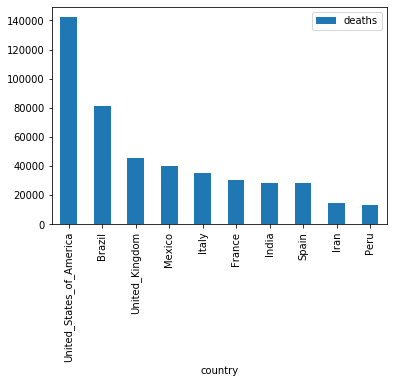

In [41]:
l.plot.bar()
plt.savefig("Top 10 countries in COVID-19 deaths.png")

In [42]:
m=country_wise.nlargest(10, ['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'])
m.drop("deaths",axis=1,inplace=True)
m.drop("cases",axis=1,inplace=True)
m

,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
country,
Qatar,51740.192954
Bahrain,29202.322254
San_Marino,29022.146112
Chile,23633.198229
Kuwait,18781.020647
Holy_See,18527.607362
Oman,16934.117683
Panama,15949.195090
Armenia,15540.610901


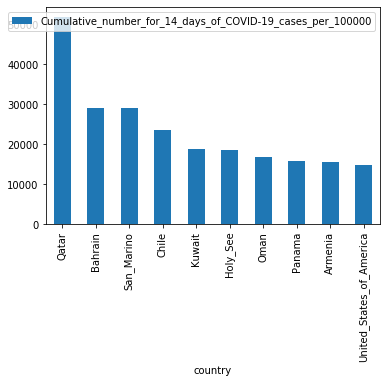

In [43]:
m.plot.bar()
plt.savefig("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000")